In [1]:
import pandas as pd
import numpy as np
import zipfile
import sys, os

%pylab inline

Populating the interactive namespace from numpy and matplotlib


## 载入并查看数据

In [2]:
%%time
df = pd.read_csv('data/globalterrorismdb_0718dist.csv', encoding='ISO-8859-1', low_memory=False)  # 载入数据

Wall time: 6.09 s


由[Codebook](http://start.umd.edu/gtd/downloads/Codebook.pdf)，我们知道该数据集中还含有一些隐形的缺失值：

|ATTRIBUTE|PYTHON DTYPE|CODE BOOK TYPE|DEFINITION|
|:----------------|:--------|:------------|:---------------------------------------|
|eventid|int64|Numeric|12-digit Event ID system. First 8 numbers - date recorded "yyyymmdd". Last 4 numbers - sequential case number for the given day|
|iyear|int64|Numeric|The year in which the incident occurred|
|imonth|int64|Numeric|The month in which the incident occurred.  When the exact month of the incident is unknown, this will be recorded as "0".|
|iday|int64|Numeric|The numeric day of the month on which the incident occurred.  When the exact day of the incident is unknown, the field is recorded as "0".|
|extended|object|Categorical|The duration of an incident extended more than 24 hours.  1 = YES, 0 = NO|
|country_txt|object|Categorical|Identifies the country or location where the incident occurred.  When incident occurred cannot be identified, it is coded as "Unknown.|
|region_txt|object|Categorical|Identifies the region in which the incident occurred, and divided into 1 of 12 categories|
|provstate|object|Text|The name (at the time of event) of the 1st order subnational administrative region in which the event occurs|
|city|object|Text|The name of the city, village, or town in which the incident occurred.  If unknown, then this field contains the smallest administrative area below provstate|
|latitude|float64|Numeric|The latitude (based on WGS1984 standards) of the city in which the event occurred|
|longitude|float64|Numeric|The longitude (based on WGS1984 standards) of the city in which the event occurred.|
|specificity|float64|Categorical|Identifies the geospatial resolution of the latitude and longitude fields. 1 to 5|
|vicinity|object|Categorical|1 = YES, The incident occurred in the immediate vicinity of the city in question.  0 = NO, The incident in the city itself.|
|summary|object|Text|A brief narrative summary of the incident, noting the "when, where, who, what, how, and why.|
|crit1|object|Categorical|The violent act must be aimed at attaining a political, economic, religious, or social goal. 1 = YES, 0 = NO|
|crit2|object|Categorical|There must be evidence of an intention to coerce, intimidate, or convey some other message to a larger audience than the immediate victims. 1 = YES, 0 = NO|
|crit3|object|Categorical|The action is outside the context of legitimate warfare activities, insofar as it targets non-combatants.  1 = YES, 0 = NO|
|doubtterr|object|Categorical|There is doubt as to whether the incident is an act of terrorism.  1 = YES, 0 = NO|
|multiple|object|Categorical|Denote that the particular attack was part of a "multiple" incident.  1 = YES, 0 = NO|
|success|object|Categorical|A successful attack depends on the type of attack. The key question is whether or not the attack type took place.  1 = YES, 0 = NO|
|suicide|object|Categorical|Coded "Yes" in those cases where there is evidence that the perpetrator did not intend to escape from the attack alive. 1 = YES, 0 = NO|
|attacktype1_txt|object|Categorical|The general method of attack and often reflects the broad class of tactics used. 9 categories|
|targtype1_txt|object|Categorical|The general type of target/victim.  22 categories|
|targsubtype1_txt|object|Categorical|The more specific target category and provides the next level of designation for each target type. If a target subtype is not applicable this variable is left blank|
|corp1|object|Text|The corporate entity or government agency that was targeted|
|target1|object|Text|The specific person, building, installation, etc., that was targeted and/or victimized|
|natlty1_txt|object|Categorical|The nationality of the target that was attacked.  For hijacking incidents, the nationality of the plane is recorded|
|gname|object|Text|The name of the group that carried out the attack|
|guncertain1|object|Categorical|Indicates whether or not the information reported about the Perpetrator Group Name(s) is based on speculation or dubious claims of responsibility.  1 = YES, 0 = NO|
|individual|object|Categorical|Indicates whether or not the attack was carried out by an individual or several individuals not known to be affiliated with a group or organization. 1 = YES, 0 = NO|
|nperpcap|float64|Numeric|The number of perpetrators taken into custody. "-99" or "Unknown" appears when there is evidence of captured, but the number is not reported|
|claimed|object|Categorical|Indicates whether a group or person(s) claimed responsibility for the attack.  1 = YES, 0 = NO|
|weaptype1_txt|object|Categorical|Records the general type of weapon used in the incident.  Up to four weapon types are recorded for each incident|
|weapsubtype1_txt|object|Categorical|A more specific value for most of the Weapon Types identified|
|nkill|float64|Numeric|Total confirmed fatalities for the incident|
|nkillus|float64|Numeric|The number of U.S. citizens who died as a result of the incident|
|nkillter|float64|Numeric|Limited to only perpetrator fatalities|
|nwound|float64|Numeric|The number of confirmed non-fatal injuries to both perpetrators and victims|
|nwoundus|float64|Numeric|The number of confirmed non-fatal injuries to U.S. citizens, both perpetrators and victims|
|nwoundte|float64|Numeric|Number of Perpetrators Injured|
|property|object|Categorical|There is evidence of property damage from the incident.  1 = YES, 0 = NO|
|ishostkid|object|Categorical|Whether or not the victims were taken hostage or kidnapped during an incident. 1 = YES, 0 = NO|
|scite1|object|Text|Cites the first source that was used to compile information on the specific incident|
|dbsource|object|Text|Identifies the original data collection effort in which each event was recorded|
|INT_LOG|object|Categorical|It indicates whether a perpetrator group crossed a border to carry out an attack (logistically international).  1 = YES, 0 = NO, -9=UNKNOWN|
|INT_IDEO|object|Categorical|It indicates whether a perpetrator group attacked a target of a different nationality (ideologically international). 1 = YES, 0 = NO, -9=UNKNOWN|
|INT_MISC|object|Categorical|It indicates whether a perpetrator group attacked a target of a different nationality (not clear if logistically or ideologically international) 1 = YES, 0 = NO, -9=UNKNOWN|
|INT_ANY|object|Categorical|The attack was international on any of the dimensions.  1 = YES, 0 = NO, -9=UNKNOWN|


**NOTE 1:** *For categorical variables, -9 was replaced with -1 per a recommendation from Dr. George at Regis University.*

**NOTE 2:** *For attributes containing 1, 0, and -1, they were replaced with a labeled version of the attribute and can be identified by a `_txt` suffix in the data frame.*

详情见[README.md](./README.md)

In [3]:
df.get_dtype_counts()

float64    55
int64      22
object     58
dtype: int64

In [4]:
# Check the number of missing values in each attribute
count = df.isnull().sum()
percent = round(count / df.shape[0] * 100, 2)
series = [count, percent]
result = pd.concat(series, axis=1, keys=['Count','Percent'])
result.sort_values(by='Count', ascending=False)  # 按缺失值数量倒序

,Count,Percent
gsubname3,181671,99.99
weapsubtype4_txt,181621,99.96
weapsubtype4,181621,99.96
weaptype4,181618,99.96
weaptype4_txt,181618,99.96
claimmode3,181558,99.93
claimmode3_txt,181558,99.93
gsubname2,181531,99.91
claim3,181373,99.82
guncertain3,181371,99.82


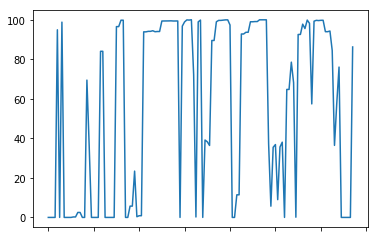

In [5]:
result['Percent'].plot()

In [6]:
target_attrs = result[result['Percent'] < 90.0]
print('留下来的特征所占比例:', round(target_attrs.shape[0]/result.shape[0], 2))

留下来的特征所占比例: 0.54


查看留下来的特征:

In [7]:
keep_attrs = target_attrs.index.values
keep_attrs

array(['eventid', 'iyear', 'imonth', 'iday', 'extended', 'country',
       'country_txt', 'region', 'region_txt', 'provstate', 'city',
       'latitude', 'longitude', 'specificity', 'vicinity', 'location',
       'summary', 'crit1', 'crit2', 'crit3', 'doubtterr', 'alternative',
       'alternative_txt', 'multiple', 'success', 'suicide', 'attacktype1',
       'attacktype1_txt', 'targtype1', 'targtype1_txt', 'targsubtype1',
       'targsubtype1_txt', 'corp1', 'target1', 'natlty1', 'natlty1_txt',
       'gname', 'motive', 'guncertain1', 'individual', 'nperps',
       'nperpcap', 'claimed', 'claimmode', 'claimmode_txt', 'weaptype1',
       'weaptype1_txt', 'weapsubtype1', 'weapsubtype1_txt', 'weapdetail',
       'nkill', 'nkillus', 'nkillter', 'nwound', 'nwoundus', 'nwoundte',
       'property', 'propextent', 'propextent_txt', 'propvalue',
       'propcomment', 'ishostkid', 'ransom', 'addnotes', 'scite1',
       'scite2', 'scite3', 'dbsource', 'INT_LOG', 'INT_IDEO', 'INT_MISC',
       'INT

In [8]:
target_attrs.sort_values(by='Count', ascending=False)  # 按缺失值数量倒序

,Count,Percent
claimmode_txt,162608,89.50
claimmode,162608,89.50
related,156653,86.22
addnotes,153402,84.43
alternative_txt,152680,84.03
alternative,152680,84.03
propvalue,142702,78.54
scite3,138175,76.05
motive,131130,72.17
location,126196,69.46


查看缺失值比例在 $80\% \sim 90\%$ 的特征:

In [9]:
df_80_90 = target_attrs[target_attrs['Percent'] > 80.0]
round(df_80_90.shape[0]/target_attrs.shape[0] * 100, 2)  # 特征数所占比例

8.22

占比是 $8.22\%$, 因而为了简化问题, 我们仅仅考虑缺失值占比小于 $80\%$ 的特征.

In [10]:
keep_attrs = target_attrs[target_attrs['Percent']<80.0]

subset_df = df.loc[:, keep_attrs.index.values]
subset_df.info(verbose = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Data columns (total 67 columns):
eventid             181691 non-null int64
iyear               181691 non-null int64
imonth              181691 non-null int64
iday                181691 non-null int64
extended            181691 non-null int64
country             181691 non-null int64
country_txt         181691 non-null object
region              181691 non-null int64
region_txt          181691 non-null object
provstate           181270 non-null object
city                181257 non-null object
latitude            177135 non-null float64
longitude           177134 non-null float64
specificity         181685 non-null float64
vicinity            181691 non-null int64
location            55495 non-null object
summary             115562 non-null object
crit1               181691 non-null int64
crit2               181691 non-null int64
crit3               181691 non-null int64
doubtterr           181690 non-null fl

In [11]:
# total no of columns and rows present in data
print("数据的尺寸:",df.shape)

数据的尺寸: (181691, 135)


In [12]:
# 留下来的特征
print("约简后数据的尺寸:",subset_df.shape)

约简后数据的尺寸: (181691, 67)


### 符号说明:
    
符号|说明
:-|:-
NV| Numeric Variable
TV|Text Variable
CV|Categorical Variable

In [13]:
names = set(subset_df.columns)

# 数值变量集合
NV = {
    'eventid', 'iyear', 'imonth', 'iday', 'latitude','longitude',
    'nperps', 'nperpcap', 'nkill', 'nkillus', 'nkillter', 'nwound',
    'nwoundus', 'nwoundte', 'propvalue', 'nhostkid', 'nhostkidus',
    'nhours', 'ndays', 'ransomamt', 'ransomamtus', 'ransompaid','ransompaidus', 'nreleased'
}

NV = names & NV

In [14]:
NV

{'eventid',
 'iday',
 'imonth',
 'iyear',
 'latitude',
 'longitude',
 'nkill',
 'nkillter',
 'nkillus',
 'nperpcap',
 'nperps',
 'nwound',
 'nwoundte',
 'nwoundus',
 'propvalue'}

In [15]:
len(NV)

15

In [16]:
NV & set(subset_df.select_dtypes(['float64', 'int64']).columns) == NV

True

In [17]:
TV = set(subset_df.select_dtypes('object').columns)
for name in TV:
    if not name.endswith('_txt'):
        print(name)

motive
scite1
corp1
summary
provstate
target1
gname
scite3
city
location
propcomment
scite2
dbsource
weapdetail


In [18]:
len(TV)

23

In [19]:
CV = names - NV - TV
CV

{'INT_ANY',
 'INT_IDEO',
 'INT_LOG',
 'INT_MISC',
 'attacktype1',
 'claimed',
 'country',
 'crit1',
 'crit2',
 'crit3',
 'doubtterr',
 'extended',
 'guncertain1',
 'individual',
 'ishostkid',
 'multiple',
 'natlty1',
 'property',
 'propextent',
 'ransom',
 'region',
 'specificity',
 'success',
 'suicide',
 'targsubtype1',
 'targtype1',
 'vicinity',
 'weapsubtype1',
 'weaptype1'}

In [20]:
len(CV)

29

In [21]:
subset_df.isnull().sum()

eventid                  0
iyear                    0
imonth                   0
iday                     0
extended                 0
country                  0
country_txt              0
region                   0
region_txt               0
provstate              421
city                   434
latitude              4556
longitude             4557
specificity              6
vicinity                 0
location            126196
summary              66129
crit1                    0
crit2                    0
crit3                    0
doubtterr                1
multiple                 1
success                  0
suicide                  0
attacktype1              0
attacktype1_txt          0
targtype1                0
targtype1_txt            0
targsubtype1         10373
targsubtype1_txt     10373
                     ...  
individual               0
nperps               71115
nperpcap             69489
claimed              66120
weaptype1                0
weaptype1_txt            0
w

## 类别信息处理

将类别变量的缺失值替换为 `-1`:

In [22]:
cat_df = subset_df[list(CV)]
cat_df.isnull().sum()

ishostkid          178
INT_IDEO             0
INT_MISC             0
success              0
targtype1            0
INT_LOG              0
property             0
region               0
attacktype1          0
crit3                0
suicide              0
vicinity             0
weaptype1            0
extended             0
crit2                0
doubtterr            1
multiple             1
ransom          104310
propextent      117626
specificity          6
weapsubtype1     20768
claimed          66120
targsubtype1     10373
crit1                0
country              0
INT_ANY              0
individual           0
natlty1           1559
guncertain1        380
dtype: int64

In [23]:
subset_df.loc[subset_df['doubtterr'] == -9, 'doubtterr'] = np.nan  # -9 未知
#subset_df['attacktype1'].replace(9, -1)
subset_df.loc[subset_df['attacktype1'] == 9, 'attacktype1'] = np.nan #  9 未知
subset_df.loc[subset_df['weaptype1'] == 13, 'weaptype1'] = np.nan # 13 未知
subset_df.loc[subset_df['targtype1'] == 20, 'targtype1'] = np.nan # 13 未知
subset_df.loc[subset_df['property'] == -9, 'property'] = np.nan
subset_df.loc[subset_df['propextent'] == 4, 'propextent'] = np.nan
subset_df.loc[subset_df['ishostkid'] == -9, 'ishostkid'] = np.nan
subset_df.loc[subset_df['INT_LOG'] == -9, 'INT_LOG'] = np.nan
subset_df.loc[subset_df['INT_IDEO'] == -9, 'INT_IDEO'] = np.nan
subset_df.loc[subset_df['INT_MISC'] == -9, 'INT_MISC'] = np.nan
subset_df.loc[subset_df['INT_ANY'] == -9, 'INT_ANY'] = np.nan
subset_df.loc[subset_df['claimed'] == -9, 'claimed'] = np.nan
subset_df.loc[subset_df['ransom'] == -9, 'ransom'] = np.nan
subset_df.loc[subset_df['specificity'] == 5, 'specificity'] = np.nan
subset_df.loc[subset_df['vicinity'] == -9, 'vicinity'] = np.nan

In [24]:
cat_df = subset_df[list(CV)]
cat_df.isnull().sum()

ishostkid          495
INT_IDEO         92659
INT_MISC           487
success              0
targtype1         5898
INT_LOG          92527
property         21386
region               0
attacktype1       7276
crit3                0
suicide              0
vicinity            35
weaptype1        15157
extended             0
crit2                0
doubtterr        13785
multiple             1
ransom          105708
propextent      137472
specificity       4556
weapsubtype1     20768
claimed          67594
targsubtype1     10373
crit1                0
country              0
INT_ANY          83830
individual           0
natlty1           1559
guncertain1        380
dtype: int64

In [25]:
subset_df[list(CV)] = subset_df[list(CV)].replace(np.nan, -1)

In [26]:
subset_df[list(CV)].isnull().sum()

ishostkid       0
INT_IDEO        0
INT_MISC        0
success         0
targtype1       0
INT_LOG         0
property        0
region          0
attacktype1     0
crit3           0
suicide         0
vicinity        0
weaptype1       0
extended        0
crit2           0
doubtterr       0
multiple        0
ransom          0
propextent      0
specificity     0
weapsubtype1    0
claimed         0
targsubtype1    0
crit1           0
country         0
INT_ANY         0
individual      0
natlty1         0
guncertain1     0
dtype: int64

## 文本信息处理

In [27]:
txt_df = subset_df[list(TV)]
txt_df.isnull().sum()

weapsubtype1_txt     20768
motive              131130
scite1               66191
corp1                42550
summary              66129
attacktype1_txt          0
provstate              421
target1                636
gname                    0
natlty1_txt           1559
scite3              138175
country_txt              0
city                   434
location            126196
targtype1_txt            0
propcomment         123732
targsubtype1_txt     10373
scite2              104758
dbsource                 0
propextent_txt      117626
region_txt               0
weaptype1_txt            0
weapdetail           67670
dtype: int64

In [28]:
np.unique(txt_df.isin(['Unknown']))

array([False,  True])

In [29]:
np.unique(txt_df.isin(['UNKNOWN']))

array([False])

In [30]:
txt_df = txt_df.replace('Unknown', np.nan)

In [31]:
txt_df.isnull().sum()

weapsubtype1_txt     20768
motive              146019
scite1               66191
corp1                58906
summary              66129
attacktype1_txt       7276
provstate             4711
target1               6554
gname                82782
natlty1_txt           1559
scite3              138175
country_txt              0
city                 10209
location            126212
targtype1_txt         5898
propcomment         123733
targsubtype1_txt     10373
scite2              104758
dbsource                 0
propextent_txt      137472
region_txt               0
weaptype1_txt        15157
weapdetail           67670
dtype: int64

In [32]:
subset_df[list(TV)] = subset_df[list(TV)].replace(np.nan, 'Unknown')
subset_df[list(TV)].isnull().sum()

weapsubtype1_txt    0
motive              0
scite1              0
corp1               0
summary             0
attacktype1_txt     0
provstate           0
target1             0
gname               0
natlty1_txt         0
scite3              0
country_txt         0
city                0
location            0
targtype1_txt       0
propcomment         0
targsubtype1_txt    0
scite2              0
dbsource            0
propextent_txt      0
region_txt          0
weaptype1_txt       0
weapdetail          0
dtype: int64

## 数值型变量

In [33]:
subset_df[list(NV)].isnull().sum()

propvalue    142702
nwoundte      69143
eventid           0
longitude      4557
nwound        16311
iyear             0
nperpcap      69489
nkill         10313
nwoundus      64702
iday              0
nperps        71115
imonth            0
nkillus       64446
latitude       4556
nkillter      66958
dtype: int64

In [34]:
np.unique(subset_df.isin([-9, -99]))

array([False,  True])

In [35]:
nv_df = subset_df[list(NV)].replace([-9, -99], np.nan)
nv_df.isnull().sum()

propvalue    171315
nwoundte      69143
eventid           0
longitude      4557
nwound        16311
iyear             0
nperpcap      71355
nkill         10313
nwoundus      64702
iday              0
nperps       153335
imonth            0
nkillus       64446
latitude       4557
nkillter      66958
dtype: int64

In [36]:
subset_df[list(NV)] = subset_df[list(NV)].replace([-9, -99], np.nan)

In [37]:
subset_df[list(names - NV)].isnull().sum()

weapsubtype1_txt    0
motive              0
corp1               0
INT_IDEO            0
attacktype1_txt     0
targtype1           0
provstate           0
region              0
suicide             0
gname               0
vicinity            0
scite3              0
weaptype1           0
extended            0
crit2               0
doubtterr           0
location            0
targtype1_txt       0
targsubtype1_txt    0
propextent          0
specificity         0
weapsubtype1        0
region_txt          0
crit1               0
weapdetail          0
country             0
natlty1             0
guncertain1         0
scite1              0
summary             0
ishostkid           0
INT_MISC            0
INT_LOG             0
property            0
target1             0
attacktype1         0
crit3               0
natlty1_txt         0
country_txt         0
city                0
propcomment         0
multiple            0
ransom              0
scite2              0
claimed             0
dbsource  

In [38]:
subset_df.to_hdf('data/globalterrorismdb_0718dist.h5', key='gtd_df')

## 处理二值变量

```py
# Map the codes to labels
ynu_map = {1: 'Yes', 0: 'No', -1: 'Unknown'}

# List of target attributes to map
ynu_attrs =['extended', 'vicinity', 'crit1', 'crit2', 'crit3', 'doubtterr', 'multiple', 
            'success', 'suicide', 'guncertain1', 'individual', 'claimed', 'property', 
            'ishostkid', 'INT_LOG', 'INT_IDEO', 'INT_MISC', 'INT_ANY']

# Iterate over each target attribute and map it
for att in ynu_attrs:
    att_txt = att + '_txt'
    subset_df[att_txt] = subset_df[att].map(ynu_map)

# Get the list of attributes, dropping the coded for labeled attributes
final_attrs = []

for attr in subset_df.columns.values:
    if attr not in ynu_attrs:
        final_attrs.append(attr)
        
subset_df2 = subset_df.loc[:, final_attrs]
subset_df2.info(verbose = True)

subset_df2.to_excel("./data/gtd_preprocessed.xlsx")
```